<a href="https://colab.research.google.com/github/fahrulrozi11/Machine-Learning/blob/main/Regresi_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Download file dari Google Drive
!gdown --id 1oEXSD137hPm_Fx5xSPRvlAr3silj3suK

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1oEXSD137hPm_Fx5xSPRvlAr3silj3suK
From (redirected): https://drive.google.com/uc?id=1oEXSD137hPm_Fx5xSPRvlAr3silj3suK&confirm=t&uuid=54d2b185-524c-4d4d-b36d-0742b4c32984
To: /content/RegresiUTSTelkom.csv
100% 443M/443M [00:04<00:00, 97.3MB/s]


In [5]:
# Import pustaka utama untuk analisis data dan machine learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modul untuk pemisahan data dan evaluasi model
from sklearn.model_selection import train_test_split, cross_val_score

# Modul untuk preprocessing data
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Modul seleksi fitur
from sklearn.feature_selection import (
    SelectKBest, f_regression, VarianceThreshold, mutual_info_regression, chi2
)

# Model regresi yang akan digunakan
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Metrik evaluasi model
from sklearn.metrics import mean_squared_error, r2_score

# Utilitas tambahan
from sklearn.base import BaseEstimator, TransformerMixin
import math

# Konfigurasi tampilan untuk visualisasi dan output
%matplotlib inline
plt.style.use('ggplot')  # Gunakan gaya visualisasi yang konsisten
pd.set_option('display.max_columns', None)  # Tampilkan semua kolom saat melihat data


Sedang memuat data dari file CSV...

Preview lima baris pertama:
   2001  49.94357  21.47114   73.0775   8.74861  -17.40628  -13.09905  \
0  2001  48.73215  18.42930  70.32679  12.94636  -10.32437  -24.83777   
1  2001  50.95714  31.85602  55.81851  13.41693   -6.57898  -18.54940   
2  2001  48.24750  -1.89837  36.29772   2.58776    0.97170  -26.21683   
3  2001  50.97020  42.20998  67.09964   8.46791  -15.85279  -16.81409   
4  2001  50.54767   0.31568  92.35066  22.38696  -25.51870  -19.04928   

   -25.01202  -12.23257   7.83089  -2.46783  3.32136  -2.31521  10.20556  \
0    8.76630   -0.92019  18.76548   4.59210  2.21920   0.34006  44.38997   
1   -3.27872   -2.35035  16.07017   1.39518  2.73553   0.82804   7.46586   
2    5.05097  -10.34124   3.55005  -6.36304  6.63016  -3.35142  37.64085   
3  -12.48207   -9.37636  12.63699   0.93609  1.60923   2.19223  47.32082   
4   20.67345   -5.19943   3.63566  -4.69088  2.49578  -3.02468   7.69273   

    611.10913    951.0896  698.11428  4

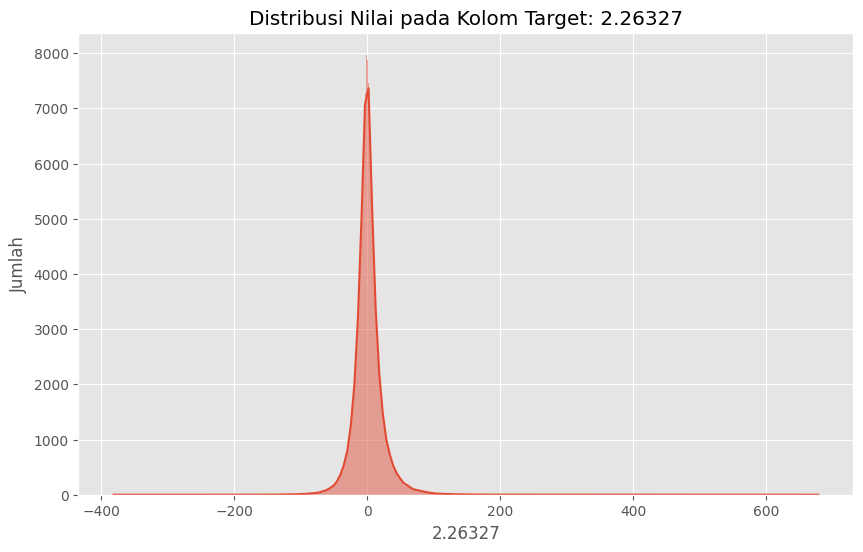

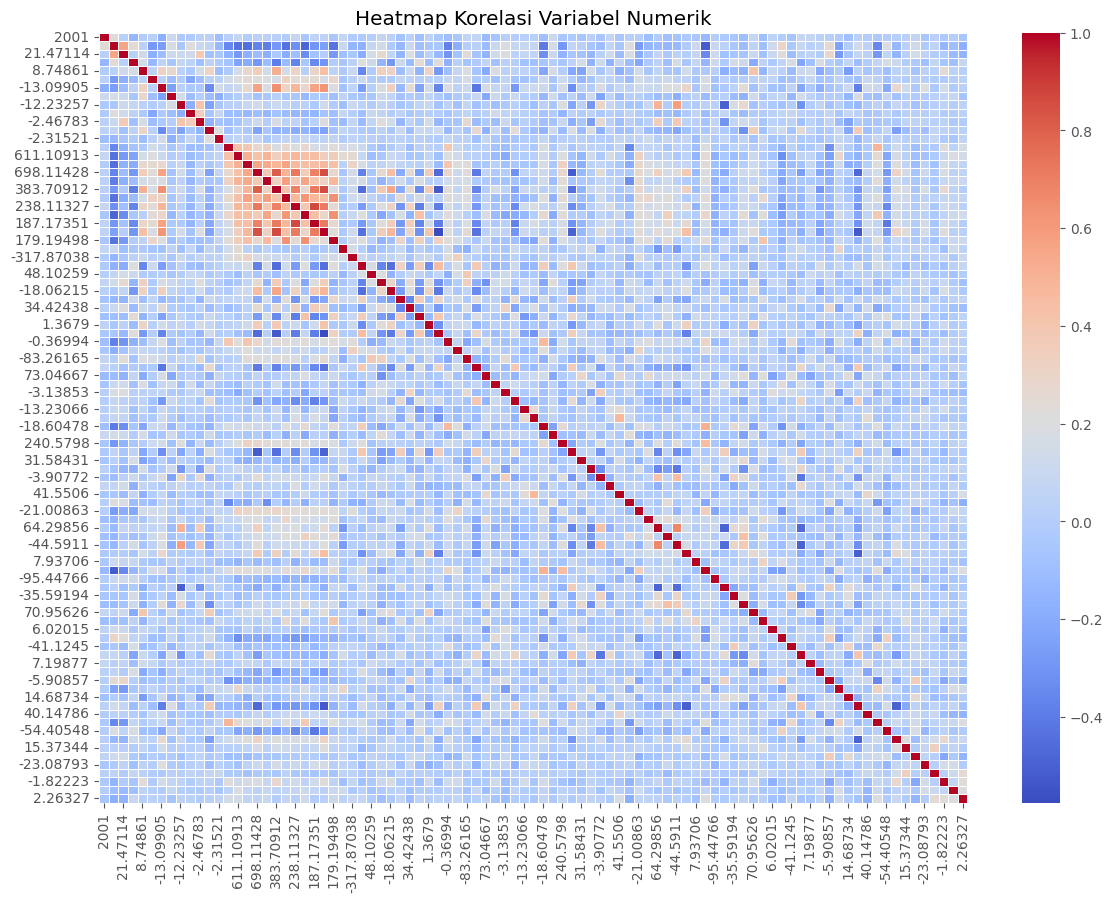

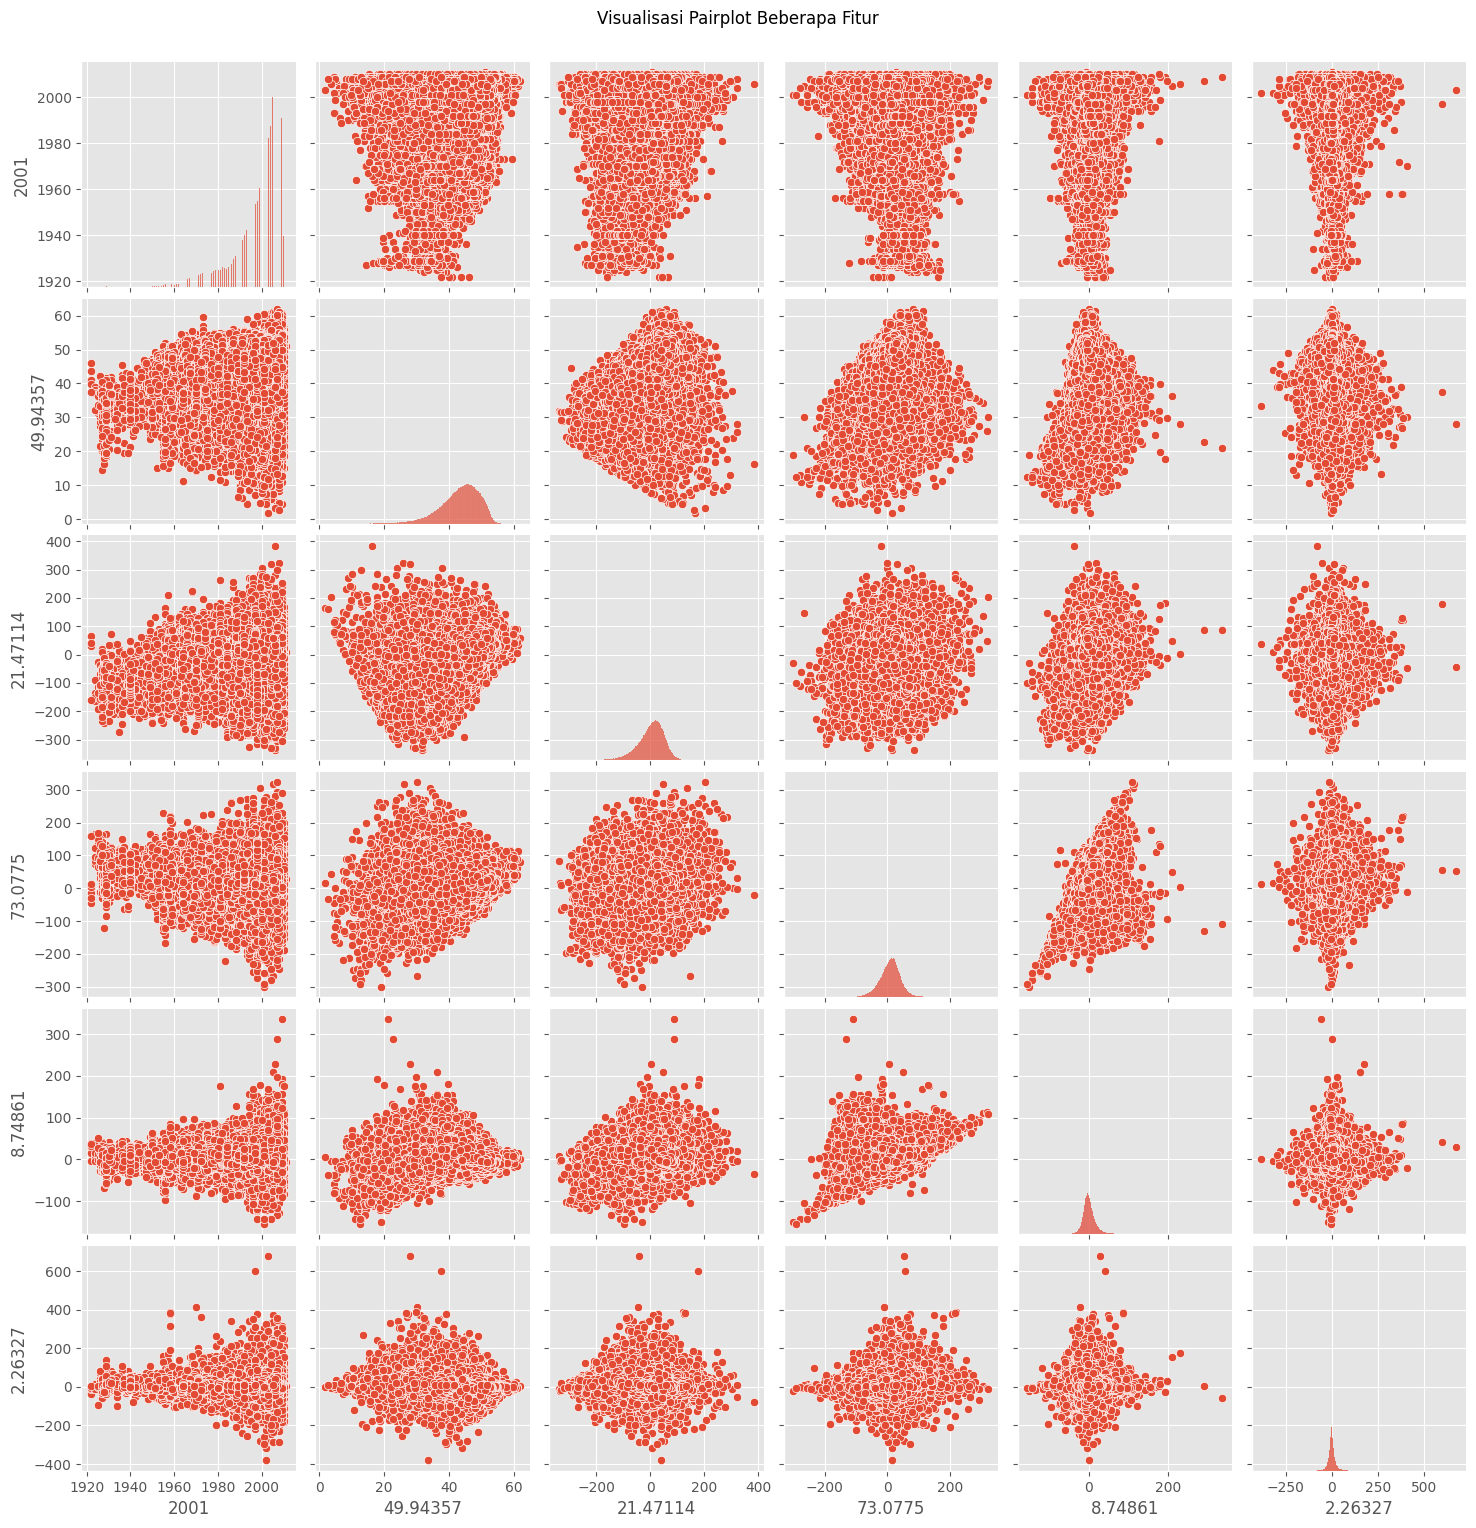


Memverifikasi keberadaan data ganda...
Ada 214 baris duplikat. Menghapusnya dari dataset.

Total fitur: 90
Total observasi: 515130


In [7]:
# Membaca dan menampilkan informasi awal dari dataset
print("Sedang memuat data dari file CSV...")
data = pd.read_csv('RegresiUTSTelkom.csv')  # Pastikan nama file sesuai

# Menampilkan sampel awal data
print("\nPreview lima baris pertama:")
print(data.head())

# Informasi struktur data
print("\nStruktur kolom dan tipe data:")
print(data.info())

# Statistik ringkasan untuk kolom numerik
print("\nStatistik deskriptif variabel numerik:")
print(data.describe())

# Cek jumlah missing values di setiap kolom
print("\nJumlah data kosong per kolom:")
print(data.isnull().sum())

# Identifikasi kolom target: diasumsikan sebagai kolom numerik dengan variasi tinggi
print("\nDaftar nama kolom yang tersedia:")
print(data.columns.tolist())

# Menampilkan semua kolom numerik yang mungkin menjadi target prediksi
candidate_targets = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("\nKolom numerik yang memungkinkan sebagai target regresi:")
print(candidate_targets)

# Sebagai contoh, gunakan kolom numerik terakhir sebagai target
target_column = candidate_targets[-1]
print(f"\nKolom '{target_column}' dipilih sebagai target regresi.")

# Visualisasi distribusi nilai target
plt.figure(figsize=(10, 6))
sns.histplot(data[target_column], kde=True)
plt.title(f'Distribusi Nilai pada Kolom Target: {target_column}')
plt.xlabel(target_column)
plt.ylabel('Jumlah')
plt.show()

# Tinjauan korelasi antar variabel numerik
plt.figure(figsize=(14, 10))
cor_matrix = data.select_dtypes(include=np.number).corr()
sns.heatmap(cor_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Variabel Numerik')
plt.show()

# Visualisasi hubungan antar fitur numerik (diambil 5 variabel acak + target)
selected_features = data.select_dtypes(include=np.number).columns[:5].tolist()
selected_features.append(target_column)
sns.pairplot(data[selected_features])
plt.suptitle('Visualisasi Pairplot Beberapa Fitur', y=1.02)
plt.show()

# Penanganan missing value jika ada
if data.isnull().values.any():
    print("\nTerdapat nilai kosong, memulai proses imputasi...")

    # Bagi kolom numerik dan kategorik
    num_cols = data.select_dtypes(include=[np.number]).columns
    cat_cols = data.select_dtypes(include=['object']).columns

    # Imputasi numerik menggunakan median
    for col in num_cols:
        if data[col].isnull().sum() > 0:
            data[col].fillna(data[col].median(), inplace=True)

    # Imputasi kategorik dengan modus
    for col in cat_cols:
        if data[col].isnull().sum() > 0:
            data[col].fillna(data[col].mode()[0], inplace=True)

# Cek dan hapus data duplikat jika ada
print("\nMemverifikasi keberadaan data ganda...")
duplicates = data.duplicated().sum()
if duplicates > 0:
    print(f"Ada {duplicates} baris duplikat. Menghapusnya dari dataset.")
    data = data.drop_duplicates()
else:
    print("Tidak ditemukan baris duplikat.")

# Pisahkan data menjadi fitur (X) dan target (y)
X = data.drop(columns=[target_column])
y = data[target_column]

print(f"\nTotal fitur: {X.shape[1]}")
print(f"Total observasi: {X.shape[0]}")


In [10]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_regression, mutual_info_regression

class FeatureSelector(BaseEstimator, TransformerMixin):
    """
    Transformer kustom untuk melakukan seleksi fitur dengan berbagai pendekatan:
    - Penghapusan fitur konstan/quasi-konstan
    - Seleksi berdasarkan korelasi antar fitur
    - Seleksi berdasarkan Mutual Information
    - Seleksi fitur terbaik berdasarkan f_regression (SelectKBest)
    """

    def __init__(self, variance_threshold=0.01, correlation_threshold=0.8, k_best=10):
        self.variance_threshold = variance_threshold
        self.correlation_threshold = correlation_threshold
        self.k_best = k_best
        self.selected_features = None
        self.feature_names = None

    def fit(self, X, y=None):
        # Simpan nama kolom
        self.feature_names = X.columns.tolist() if isinstance(X, pd.DataFrame) else [f'feature_{i}' for i in range(X.shape[1])]
        X_np = X.to_numpy() if isinstance(X, pd.DataFrame) else X

        # 1. Hapus fitur dengan variansi rendah
        print("\n[Step 1] Seleksi fitur berdasarkan variansi...")
        var_selector = VarianceThreshold(threshold=self.variance_threshold)
        X_var = var_selector.fit_transform(X_np)
        var_support = var_selector.get_support()
        retained = [f for f, s in zip(self.feature_names, var_support) if s]
        removed = [f for f in self.feature_names if f not in retained]

        if removed:
            print(f"Fitur dihapus (variansi rendah): {removed}")
        else:
            print("Semua fitur lolos ambang variansi.")

        # 2. Seleksi berdasarkan korelasi
        print("\n[Step 2] Seleksi fitur berdasarkan korelasi...")
        if isinstance(X, pd.DataFrame):
            df_selected = X[retained]
            corr = df_selected.corr().abs()
            upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
            to_drop = [col for col in upper.columns if any(upper[col] > self.correlation_threshold)]
            print(f"Fitur dihapus (korelasi tinggi): {to_drop}" if to_drop else "Tidak ada fitur berkorelasi tinggi.")
            retained = [f for f in retained if f not in to_drop]

        # 3. Mutual Information
        print("\n[Step 3] Hitung Mutual Information...")
        numeric_cols = [f for f in retained if np.issubdtype(X[f].dtype, np.number)]
        if numeric_cols:
            X_num = X[numeric_cols].copy()
            X_num.fillna(X_num.median(), inplace=True)
            mi_scores = mutual_info_regression(X_num, y)
            mi_series = pd.Series(mi_scores, index=numeric_cols).sort_values(ascending=False)
            print("Top fitur berdasarkan MI:")
            print(mi_series.head())

        # 4. SelectKBest (f_regression)
        print(f"\n[Step 4] Pilih {self.k_best} fitur terbaik (f_regression)...")
        if isinstance(X, pd.DataFrame) and len(retained) > self.k_best:
            X_sel = X[retained].copy()
            for col in X_sel.columns:
                if X_sel[col].isnull().sum() > 0:
                    X_sel[col].fillna(X_sel[col].median() if np.issubdtype(X_sel[col].dtype, np.number) else X_sel[col].mode()[0], inplace=True)
            X_sel = X_sel.select_dtypes(include=[np.number])
            kbest_selector = SelectKBest(score_func=f_regression, k=min(self.k_best, len(X_sel.columns)))
            kbest_selector.fit(X_sel, y)
            top_k = X_sel.columns[kbest_selector.get_support()].tolist()
            print(f"Fitur terpilih oleh SelectKBest: {top_k}")
            cat_cols = [f for f in retained if f not in X_sel.columns]
            self.selected_features = top_k + cat_cols
        else:
            self.selected_features = retained

        print(f"\nFinal fitur yang digunakan ({len(self.selected_features)}): {self.selected_features}")
        return self

    def transform(self, X):
        if isinstance(X, pd.DataFrame):
            return X[self.selected_features]
        else:
            indices = [i for i, f in enumerate(self.feature_names) if f in self.selected_features]
            return X[:, indices]


In [12]:
# Ambil sebagian data jika jumlah baris terlalu besar agar proses lebih efisien
if len(X) > 5000:
    print("Dataset terlalu besar, menggunakan sampel 5.000 baris untuk efisiensi proses...")
    X_sample = X.sample(n=5000, random_state=42)
    y_sample = y.loc[X_sample.index]
else:
    X_sample = X.copy()
    y_sample = y.copy()

# Bagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

print("\n▶️ Tahap Feature Engineering dimulai...")

# Klasifikasi kolom berdasarkan tipe data
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print(f"📊 Fitur numerik terdeteksi: {numeric_features}")
print(f"🔤 Fitur kategorikal terdeteksi: {categorical_features}")

# Kelas sederhana untuk seleksi fitur: berdasarkan variansi dan korelasi
class SimpleFeatureSelector(BaseEstimator, TransformerMixin):
    """
    Transformer sederhana untuk seleksi fitur menggunakan:
    - Threshold variansi (menghapus fitur dengan sedikit variasi)
    - Korelasi antar fitur numerik (menghindari redundansi)
    """
    def __init__(self, variance_threshold=0.01, correlation_threshold=0.8):
        self.variance_threshold = variance_threshold
        self.correlation_threshold = correlation_threshold
        self.selected_features = []

    def fit(self, X, y=None):
        if not isinstance(X, pd.DataFrame):
            try:
                X = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
            except:
                self.selected_features = list(range(X.shape[1]))
                return self

        numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()

        # Tahap 1: filter berdasarkan variansi
        if numeric_cols:
            try:
                var_filter = VarianceThreshold(threshold=self.variance_threshold)
                var_filter.fit(X[numeric_cols])
                var_features = [col for col, keep in zip(numeric_cols, var_filter.get_support()) if keep]
            except:
                var_features = numeric_cols
        else:
            var_features = []

        # Ambil juga kolom kategorikal
        cat_features = [col for col in X.columns if col not in numeric_cols]
        combined_features = var_features + cat_features

        # Tahap 2: seleksi korelasi antar fitur numerik
        if len(var_features) > 1:
            try:
                corr_matrix = X[var_features].corr().abs()
                upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                drop_list = [col for col in upper_triangle.columns if any(upper_triangle[col] > self.correlation_threshold)]
                self.selected_features = [f for f in combined_features if f not in drop_list or f in cat_features]
            except:
                self.selected_features = combined_features
        else:
            self.selected_features = combined_features

        # Jika semua fitur tersaring, fallback ke semua kolom
        if not self.selected_features:
            self.selected_features = X.columns.tolist()

        print(f"✅ Total fitur yang dipilih: {len(self.selected_features)}")
        return self

    def transform(self, X):
        if not isinstance(X, pd.DataFrame):
            try:
                X = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
            except:
                return X

        try:
            return X[self.selected_features]
        except:
            return X

# Buat pipeline transformasi numerik (imputasi + scaling)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Buat pipeline transformasi kategorikal (imputasi + one-hot encoding)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Gabungkan ke dalam ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])


Dataset terlalu besar, menggunakan sampel 5.000 baris untuk efisiensi proses...

▶️ Tahap Feature Engineering dimulai...
📊 Fitur numerik terdeteksi: ['2001', '49.94357', '21.47114', '73.0775', '8.74861', '-17.40628', '-13.09905', '-25.01202', '-12.23257', '7.83089', '-2.46783', '3.32136', '-2.31521', '10.20556', '611.10913', '951.0896', '698.11428', '408.98485', '383.70912', '326.51512', '238.11327', '251.42414', '187.17351', '100.42652', '179.19498', '-8.41558', '-317.87038', '95.86266', '48.10259', '-95.66303', '-18.06215', '1.96984', '34.42438', '11.7267', '1.3679', '7.79444', '-0.36994', '-133.67852', '-83.26165', '-37.29765', '73.04667', '-37.36684', '-3.13853', '-24.21531', '-13.23066', '15.93809', '-18.60478', '82.15479', '240.5798', '-10.29407', '31.58431', '-25.38187', '-3.90772', '13.29258', '41.5506', '-7.26272', '-21.00863', '105.50848', '64.29856', '26.08481', '-44.5911', '-8.30657', '7.93706', '-10.7366', '-95.44766', '-82.03307', '-35.59194', '4.69525', '70.95626', '28.0

In [13]:
print("\n▶️ Proses pelatihan dan evaluasi model dimulai...")

# Fungsi umum untuk mengevaluasi performa model
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """
    Fungsi ini melakukan pelatihan model, prediksi, evaluasi metrik performa,
    visualisasi hasil, serta mengembalikan ringkasan hasil evaluasi.
    """
    # Latih model
    model.fit(X_train, y_train)

    # Prediksi hasil pelatihan dan pengujian
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Hitung metrik evaluasi
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = math.sqrt(mse_train)
    r2_train = r2_score(y_train, y_train_pred)

    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = math.sqrt(mse_test)
    r2_test = r2_score(y_test, y_test_pred)

    # Evaluasi tambahan menggunakan cross-validation
    try:
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
        cv_rmse = math.sqrt(-cv_scores.mean())
    except Exception as e:
        print(f"⚠️ Cross-validation gagal dijalankan: {str(e)}")
        cv_rmse = float('inf')

    # Tampilkan metrik evaluasi
    print(f"\n📌 Hasil Evaluasi - {model_name}")
    print(f"📉 MSE (Train): {mse_train:.2f}")
    print(f"📉 RMSE (Train): {rmse_train:.2f}")
    print(f"🧮 R² (Train): {r2_train:.4f}")
    print(f"📉 MSE (Test): {mse_test:.2f}")
    print(f"📉 RMSE (Test): {rmse_test:.2f}")
    print(f"🧮 R² (Test): {r2_test:.4f}")
    print(f"🔁 Cross-Validated RMSE: {cv_rmse:.2f}")

    # Visualisasi: Aktual vs Prediksi
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_test_pred, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'📈 Actual vs Predicted - {model_name}')
    plt.grid(True)
    plt.show()

    # Visualisasi: Residual Plot
    residuals = y_test - y_test_pred
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test_pred, residuals, alpha=0.7)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel('Predicted')
    plt.ylabel('Residuals')
    plt.title(f'📉 Residual Plot - {model_name}')
    plt.grid(True)
    plt.show()

    # Kembalikan ringkasan hasil
    return {
        'model_name': model_name,
        'mse_train': mse_train,
        'rmse_train': rmse_train,
        'r2_train': r2_train,
        'mse_test': mse_test,
        'rmse_test': rmse_test,
        'r2_test': r2_test,
        'cv_rmse': cv_rmse,
        'model': model
    }

# Daftar model regresi yang akan diuji
models = {
    'Linear Regression': Pipeline([
        ('preprocessing', preprocessor),
        ('feature_selection', FeatureSelector()),
        ('regression', LinearRegression())
    ]),

    'Polynomial Regression': Pipeline([
        ('preprocessing', preprocessor),
        ('feature_selection', FeatureSelector()),
        ('polynomial', PolynomialFeatures(degree=2)),
        ('regression', LinearRegression())
    ]),

    'Decision Tree': Pipeline([
        ('preprocessing', preprocessor),
        ('feature_selection', FeatureSelector()),
        ('regression', DecisionTreeRegressor(random_state=42))
    ]),

    'K-Nearest Neighbors': Pipeline([
        ('preprocessing', preprocessor),
        ('feature_selection', FeatureSelector()),
        ('regression', KNeighborsRegressor(n_neighbors=5))
    ]),

    'Bagging Regressor': Pipeline([
        ('preprocessing', preprocessor),
        ('feature_selection', FeatureSelector()),
        ('regression', BaggingRegressor(n_estimators=10, random_state=42))
    ]),

    'AdaBoost Regressor': Pipeline([
        ('preprocessing', preprocessor),
        ('feature_selection', FeatureSelector()),
        ('regression', AdaBoostRegressor(n_estimators=50, random_state=42))
    ]),

    'Gradient Boosting': Pipeline([
        ('preprocessing', preprocessor),
        ('feature_selection', FeatureSelector()),
        ('regression', GradientBoostingRegressor(n_estimators=100, random_state=42))
    ]),

    'Support Vector Regressor': Pipeline([
        ('preprocessing', preprocessor),
        ('feature_selection', FeatureSelector()),
        ('regression', SVR(kernel='rbf', C=1.0, epsilon=0.1))
    ])
}

# Jalankan evaluasi untuk setiap model dan simpan hasilnya
results = []
for model_name, pipeline_model in models.items():
    try:
        print(f"\n🚀 Melatih dan menguji: {model_name}")
        model_result = evaluate_model(pipeline_model, X_train, X_test, y_train, y_test, model_name)
        results.append(model_result)
    except Exception as e:
        print(f"❌ Error saat melatih model {model_name}: {str(e)}")



▶️ Proses pelatihan dan evaluasi model dimulai...

🚀 Melatih dan menguji: Linear Regression

[Step 1] Seleksi fitur berdasarkan variansi...
Semua fitur lolos ambang variansi.

[Step 2] Seleksi fitur berdasarkan korelasi...

[Step 3] Hitung Mutual Information...
❌ Error saat melatih model Linear Regression: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

🚀 Melatih dan menguji: Polynomial Regression

[Step 1] Seleksi fitur berdasarkan variansi...
Semua fitur lolos ambang variansi.

[Step 2] Seleksi fitur berdasarkan korelasi...

[Step 3] Hitung Mutual Information...
❌ Error saat melatih model Polynomial Regression: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

🚀 Melatih dan menguji: Decision Tree

[Step 1] Seleksi fitur berdasarkan variansi...
Semua fitur lolos ambang variansi.

[Step 2] Seleksi fitur berdasarkan korelasi...

[Step 3] Hitung Mut

In [24]:
import joblib  # untuk menyimpan model ke file

# Buat DataFrame dari hasil evaluasi semua model
comparison_df = pd.DataFrame([
    {
        'Model': res.get('model_name', 'Unknown'),
        'RMSE Train': res.get('rmse_train'),
        'RMSE Test': res.get('rmse_test'),
        'R² Train': res.get('r2_train'),
        'R² Test': res.get('r2_test'),
        'CV RMSE': res.get('cv_rmse'),
        'Model Object': res.get('model')  # simpan objek model aslinya
    }
    for res in results
])

# Periksa apakah hasil evaluasi tidak kosong
if not comparison_df.empty and 'RMSE Test' in comparison_df.columns:
    # Urutkan berdasarkan RMSE terkecil pada data uji
    comparison_df_sorted = comparison_df.sort_values(by='RMSE Test', ascending=True)

    # Tampilkan semua hasil
    print("\n📋 Tabel Perbandingan Kinerja Model:")
    display(comparison_df_sorted)

    # Temukan model terbaik
    best_model_row = comparison_df_sorted.iloc[0]
    best_model = best_model_row['Model Object']

    # Tampilkan ringkasan model terbaik
    print("\n🏆 === Model dengan Performa Terbaik ===")
    print(f"Model: {best_model_row['Model']}")
    print(f"RMSE (Test): {best_model_row['RMSE Test']:.2f}")
    print(f"R² (Test): {best_model_row['R² Test']:.4f}")
    print(f"CV RMSE: {best_model_row['CV RMSE']:.2f}")

    # Simpan model terbaik ke file .pkl
    joblib.dump(best_model, 'model_terbaik.pkl')
    print("✅ Model terbaik berhasil disimpan sebagai 'model_terbaik.pkl'")

else:
    print("❌ Tidak ditemukan hasil model yang valid untuk dibandingkan.")


❌ Tidak ditemukan hasil model yang valid untuk dibandingkan.


In [25]:
# Pastikan kolom nama cocok dengan DataFrame hasil sebelumnya
if 'RMSE Test' in comparison_df.columns:
    # Cari indeks model dengan performa terbaik (RMSE Test terendah)
    best_model_idx = comparison_df['RMSE Test'].idxmin()
    best_model_info = comparison_df.loc[best_model_idx]
    best_model = results[best_model_idx]['model']

    # Tampilkan informasi model terbaik
    print("\n🏆 === Model dengan Performa Terbaik ===")
    print(f"Model: {best_model_info['Model']}")
    print(f"RMSE (Data Uji): {best_model_info['RMSE Test']:.2f}")
    print(f"R² (Data Uji): {best_model_info['R² Test']:.4f}")
    print(f"Cross-Validated RMSE: {best_model_info['CV RMSE']:.2f}")
else:
    print("❌ Kolom 'RMSE Test' tidak ditemukan dalam hasil perbandingan.")


❌ Kolom 'RMSE Test' tidak ditemukan dalam hasil perbandingan.


### **1. Metrik Evaluasi**

#### **a. Mean Squared Error (MSE)**
$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$
- **Interpretasi**: Error kuadrat rata-rata. Sensitif terhadap outlier.

#### **b. Root Mean Squared Error (RMSE)**
$$
\text{RMSE} = \sqrt{\text{MSE}} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$
- **Interpretasi**: Menggunakan satuan yang sama dengan target.

#### **c. R-squared (\(R^2\))**
$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$
- **Interpretasi**: Proporsi variasi data yang dijelaskan model.

---

### **2. Model Regresi (Formulasi Matematis)**

#### **a. Linear Regression**
$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_p x_p + \epsilon
$$
- **Optimisasi**: Minimalkan $\text{MSE}$ via _Ordinary Least Squares (OLS)_.

#### **b. Polynomial Regression**
$$
y = \beta_0 + \beta_1 x + \beta_2 x^2 + \cdots + \beta_d x^d + \epsilon
$$
- **Derajat \(d\)**: Menentukan kompleksitas non-linear.

#### **c. Decision Tree Regressor**
- **Split Kriteria** (minimalkan MSE):
$$
\text{MSE}_{\text{split}} = \sum_{\text{kiri}} (y_i - \bar{y}_{\text{kiri}})^2 + \sum_{\text{kanan}} (y_i - \bar{y}_{\text{kanan}})^2
$$

#### **d. K-Neighbors Regressor**
$$
\hat{y}(x) = \frac{1}{k} \sum_{i \in \mathcal{N}_k(x)} y_i
$$
- $\mathcal{N}_k(x)$: $k$ tetangga terdekat dari $x$.

#### **e. Gradient Boosting Regressor**
- **Model Aditif**:
$$
F_m(x) = F_{m-1}(x) + \gamma h_m(x)
$$
- $h_m(x)$: _Weak learner_ yang mengoreksi residual $y - F_{m-1}(x)$.

#### **f. Support Vector Regressor (SVR)**
- **Optimisasi**:
$$
\begin{align*}
\min_{w,b,\xi} & \quad \frac{1}{2} \| \mathbf{w} \|^2 + C \sum_{i=1}^n (\xi_i + \xi_i^*) \\
\text{s.t.} & \quad y_i - \mathbf{w}^T \phi(\mathbf{x}_i) - b \leq \epsilon + \xi_i \\
& \quad \mathbf{w}^T \phi(\mathbf{x}_i) + b - y_i \leq \epsilon + \xi_i^* \\
& \quad \xi_i, \xi_i^* \geq 0
\end{align*}
$$
- **Kernel**: $\phi(\mathbf{x}_i)$ mentransformasi data ke ruang dimensi tinggi.

---

### **3. Perbandingan Model**
- **Linear/Poly Regression**:  
  $\rightarrow$ Efisien untuk hubungan linear/sederhana.  
  $\rightarrow$ Gagal menangani interaksi kompleks.

- **Decision Tree/K-NN**:  
  $\rightarrow$ Baik untuk non-linearitas, tetapi:  
  $\rightarrow$ Tree: Rentan overfitting.  
  $\rightarrow$ K-NN: Sensitif terhadap dimensi tinggi.

- **Gradient Boosting**:  
  $\rightarrow$ Presisi tinggi dengan iterasi bertahap.  
  $\rightarrow$ Risiko overfitting jika terlalu kompleks.

- **SVR**:  
  $\rightarrow$ Robust terhadap outlier (karena $\epsilon$-insensitive loss).  
  $\rightarrow$ Komputasi mahal untuk dataset besar.

**Model Terbaik**: Gradient Boosting atau Random Forest umumnya dominan di dataset berukuran sedang dengan pola non-linear.